In [1]:
import time
import os
import traceback
import numpy as np
import json
import shutil
from os.path import isfile, join
import pandas as pd

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
os.chdir("../../")

In [5]:
from src.utils.test_images import image_links
from src.utils.utilities import *
from src.app.tf_serve import *
from src.pred.tf_pred import decode_predictions

In [6]:
IMAGE_LINKS = image_links
IMAGE_SHAPE = (224, 224)

In [7]:
MODEL_LOCATION = os.getcwd() + "/img-classifier-tfx/src/models/"
MODEL_LOCATION

'/Users/ashmi/Scripts/open-source/img-classifier-tfx/src/models/'

In [8]:
REST_API_PORT = "9001"
GRPC_PORT = "9000"

In [9]:
MODEL_NAME = get_model_name(MODEL_LOCATION)

# `Animals-10 Data`

### Data Preprocessing

In [17]:
image_path = os.getcwd() + "/img-classifier-tfx/data/animals-10/"
folder_names = os.listdir(image_path+"raw-img")
folder_names

['cat',
 'butterfly',
 'dog',
 'sheep',
 'spider',
 'chicken',
 'horse',
 'squirrel',
 'cow',
 'elephant']

In [18]:
image_data_path = image_path + "data"
# if not is_dir_exists(image_data_path):
#     os.makedirs(image_data_path)
# else:
#     print("path exists")

In [19]:
image_files = [f for f in os.listdir(image_data_path) if isfile(join(image_data_path, f))]
image_files[:5]

['1716.jpeg',
 'OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg',
 'OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg',
 'OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg',
 'OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg']

## `REST API`

In [20]:
REST_API_URL = f"http://localhost:9001/v1/models/{MODEL_NAME}:predict"
REST_API_URL

'http://localhost:9001/v1/models/1662731826:predict'

In [21]:
results = []
for image in image_files:
    image_location = image_data_path+"/" + image
   
    _img = preprocess_image(image_location)
    start = time.time()
    predictions = make_rest_api_call(_img, REST_API_URL)
    end = time.time()
    time_diff = end - start
    
    result = decode_predictions(predictions)

    result["image_name"]=image
    result["time"] = time_diff
    result["img_size"] = os.stat(image_location).st_size
    print(result)
    results.append(result)

2022-11-07 21:51:17.587187: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


{'predicted_label': 'tiger cat', 'probability': 0.9350538849830627, 'image_name': '1716.jpeg', 'time': 0.4389979839324951, 'img_size': 8288}
{'predicted_label': 'tiger beetle', 'probability': 0.7831747531890869, 'image_name': 'OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg', 'time': 0.531735897064209, 'img_size': 23439}
{'predicted_label': 'Welsh springer spaniel', 'probability': 0.599215567111969, 'image_name': 'OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg', 'time': 0.3932197093963623, 'img_size': 11115}
{'predicted_label': 'Border collie', 'probability': 0.11920046806335449, 'image_name': 'OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg', 'time': 0.37006521224975586, 'img_size': 8161}
{'predicted_label': 'stingray', 'probability': 0.6214554309844971, 'image_name': 'OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg', 'time': 0.5075340270996094, 'img_size': 12708}
{'predicted_label': 'trilobite', 'probability': 0.7661718130111694, 'image_name': 'OIP-YlGtxVdvx0LHygC9TqmOnQHaEU.jpeg', 'time': 0.3618307113647461, 'img_size': 6989}
{'

{'predicted_label': 'porcupine', 'probability': 0.8952087163925171, 'image_name': 'OIP-vC1DWNUBUYvsVGbtHF-nuAHaE8.jpeg', 'time': 0.41332197189331055, 'img_size': 10149}
{'predicted_label': 'black and gold garden spider', 'probability': 0.55220627784729, 'image_name': 'OIP-Jd_O7MOLVbz1q4tVA52o2AHaE3.jpeg', 'time': 0.5097410678863525, 'img_size': 15715}
{'predicted_label': 'Indian elephant', 'probability': 0.5007134079933167, 'image_name': 'OIP-mtxe6AfM2mPpZ0D7HZ1BxgHaDn.jpeg', 'time': 0.34941911697387695, 'img_size': 10924}
{'predicted_label': 'admiral', 'probability': 0.891356885433197, 'image_name': 'OIP-ResQT6jJ6cJ4pUybsYLWJgHaFy.jpeg', 'time': 0.5285308361053467, 'img_size': 14225}
{'predicted_label': 'guinea pig', 'probability': 0.509282112121582, 'image_name': 'OIP-PHavgaYnfvIMwgOhudwrjAHaFD.jpeg', 'time': 0.36960887908935547, 'img_size': 11098}
{'predicted_label': 'admiral', 'probability': 0.9005296230316162, 'image_name': 'OIP-IvmpwTRRy05FVSdOwZZU1QHaE7.jpeg', 'time': 0.34988403

{'predicted_label': 'cabbage butterfly', 'probability': 0.8060165643692017, 'image_name': 'OIP-e078YJvnOdQnan3Lww1B0wHaFj.jpeg', 'time': 0.35202908515930176, 'img_size': 10327}
{'predicted_label': 'hippopotamus', 'probability': 0.756873607635498, 'image_name': 'OIP-FRPreZ5D_EtG3PzeKKiAdQHaFk.jpeg', 'time': 0.5025959014892578, 'img_size': 12786}
{'predicted_label': 'Indian elephant', 'probability': 0.5315871834754944, 'image_name': 'OIP-2KiRXkxEUJmWLKdIZ2qCzgHaHL.jpeg', 'time': 0.3436899185180664, 'img_size': 17875}
{'predicted_label': 'bison', 'probability': 0.8670560717582703, 'image_name': 'eb33b60c21f3073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg', 'time': 0.36939215660095215, 'img_size': 65024}
{'predicted_label': 'cock', 'probability': 0.6331943273544312, 'image_name': 'OIP-uoYtaNjuM3dq1jLSMVrSpgHaFj.jpeg', 'time': 0.4744079113006592, 'img_size': 17365}
{'predicted_label': 'stingray', 'probability': 0.7085300087928772, 'image_name': 'OIP-tfpN2mDEqLwXt6v6-1m0zQHaF7.j

{'predicted_label': 'French bulldog', 'probability': 0.8857862949371338, 'image_name': 'OIP-BRsUa__xoqGpTyH7ySPZ5QHaJ-.jpeg', 'time': 0.3719351291656494, 'img_size': 15112}
{'predicted_label': 'black widow', 'probability': 0.762648344039917, 'image_name': 'OIP--onBO5AGxrNBeHD2BoN1GgHaFj.jpeg', 'time': 0.4673328399658203, 'img_size': 19655}
{'predicted_label': 'bison', 'probability': 0.5449066758155823, 'image_name': 'OIP-DZ0gUPmB8dU1clfVOU-4uwHaDe.jpeg', 'time': 0.36418795585632324, 'img_size': 11369}
{'predicted_label': 'cock', 'probability': 0.8368583917617798, 'image_name': 'OIP-9OnPmCKrbb7zY2bjGlziywHaFj.jpeg', 'time': 0.48159098625183105, 'img_size': 15683}
{'predicted_label': 'bison', 'probability': 0.695993959903717, 'image_name': 'OIP-y1p9YOHKaBS1ULUnykxztAHaE8.jpeg', 'time': 0.4222440719604492, 'img_size': 12440}
{'predicted_label': 'guinea pig', 'probability': 0.22498169541358948, 'image_name': 'OIP-S6fWXjxJVDMbFMkBMnN8QAHaKQ.jpeg', 'time': 0.3607149124145508, 'img_size': 869

{'predicted_label': 'cock', 'probability': 0.8599969744682312, 'image_name': 'OIP-nJiZVivSyNI7EDI_ICf0wQHaFj.jpeg', 'time': 0.34337687492370605, 'img_size': 18376}
{'predicted_label': 'tarantula', 'probability': 0.6459351778030396, 'image_name': 'OIP-NDJS-cBWgvkqjt7k2QrtsAHaE8.jpeg', 'time': 0.4663877487182617, 'img_size': 14675}
{'predicted_label': 'Weimaraner', 'probability': 0.5425390601158142, 'image_name': 'OIP-Wxm2QlAzZ7yOwa8DOxpp9wHaHi.jpeg', 'time': 0.3468899726867676, 'img_size': 23062}
{'predicted_label': 'ringlet', 'probability': 0.8201916217803955, 'image_name': 'OIP-L_DtWhKF24WcxTIbvdnMAAAAAA.jpeg', 'time': 0.3484928607940674, 'img_size': 10762}
{'predicted_label': 'Irish water spaniel', 'probability': 0.2486281394958496, 'image_name': 'OIP-lkHAtKUYTeIER3TIznj0mgHaE8.jpeg', 'time': 0.5327057838439941, 'img_size': 21435}
{'predicted_label': 'basset', 'probability': 0.7911424040794373, 'image_name': 'OIP-X0XGe1dNXlj9GXBCjkYa6wHaE8.jpeg', 'time': 0.8084301948547363, 'img_size

{'predicted_label': 'tarantula', 'probability': 0.505327045917511, 'image_name': 'OIP-z4u7KUGvVDP9KYGm5CyM9AHaE7.jpeg', 'time': 0.5090780258178711, 'img_size': 10341}
{'predicted_label': 'porcupine', 'probability': 0.850435733795166, 'image_name': 'OIP-A5zbQnVcmHudkBlPlGJ42AHaFj.jpeg', 'time': 0.3851327896118164, 'img_size': 10074}
{'predicted_label': 'hippopotamus', 'probability': 0.8279778361320496, 'image_name': 'OIP-O8MEDDkATMHnD845LexNlAHaFJ.jpeg', 'time': 0.6185009479522705, 'img_size': 13268}
{'predicted_label': 'admiral', 'probability': 0.7606799006462097, 'image_name': 'OIP-PcW610RjltwKt-c0QqRYqgHaFj.jpeg', 'time': 0.4439539909362793, 'img_size': 13678}
{'predicted_label': 'hippopotamus', 'probability': 0.8036353588104248, 'image_name': 'OIP-BCtbxgeXVUE2IAMkzj2AHwHaE7.jpeg', 'time': 0.5188663005828857, 'img_size': 13402}
{'predicted_label': 'Persian cat', 'probability': 0.8627017140388489, 'image_name': 'ea37b40d2cf1083ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg'

{'predicted_label': 'guinea pig', 'probability': 0.7503975033760071, 'image_name': 'OIP-Wf20SqZV2j7tmCIS2wfOJwHaFj.jpeg', 'time': 0.35085320472717285, 'img_size': 15819}
{'predicted_label': 'black and gold garden spider', 'probability': 0.22952979803085327, 'image_name': 'OIP-vxydpAV-s1N_W2jUa1xujAAAAA.jpeg', 'time': 0.35271692276000977, 'img_size': 11095}
{'predicted_label': 'sulphur butterfly', 'probability': 0.6079503297805786, 'image_name': 'ea37b10e20f2053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg', 'time': 0.5737829208374023, 'img_size': 66558}
{'predicted_label': 'Japanese spaniel', 'probability': 0.9146514534950256, 'image_name': 'OIP-UWEKEjg0Rm3FdgwACGXJEAHaJ3.jpeg', 'time': 0.3514060974121094, 'img_size': 10075}
{'predicted_label': 'black and gold garden spider', 'probability': 0.45201805233955383, 'image_name': 'OIP-VktrvPmUCK7fWhTgZ0LHOwAAAA.jpeg', 'time': 0.43484997749328613, 'img_size': 8788}
{'predicted_label': 'ram', 'probability': 0.6814197301864624, 'im

{'predicted_label': 'Weimaraner', 'probability': 0.6179797649383545, 'image_name': 'OIP-uqYx4EpSgsrcSRh3HWjkqgAAAA.jpeg', 'time': 0.3580911159515381, 'img_size': 8311}
{'predicted_label': 'tarantula', 'probability': 0.6440532803535461, 'image_name': 'OIP-dHu_ncHspBDuHfU9I8g-1AHaE8.jpeg', 'time': 0.486069917678833, 'img_size': 10884}
{'predicted_label': 'cougar', 'probability': 0.8906779289245605, 'image_name': '1487.jpeg', 'time': 0.36226606369018555, 'img_size': 12271}
{'predicted_label': 'cock', 'probability': 0.8584944605827332, 'image_name': '148.jpeg', 'time': 0.48798298835754395, 'img_size': 22505}
{'predicted_label': 'conch', 'probability': 0.8062238097190857, 'image_name': 'OIP-XCbjKuMA-wPyRgoZ69xgIAHaFS.jpeg', 'time': 0.3533010482788086, 'img_size': 14936}
{'predicted_label': 'briard', 'probability': 0.28968119621276855, 'image_name': 'OIP-1HdVVrgQHvdnTT7qTp5ALAHaGY.jpeg', 'time': 0.35349082946777344, 'img_size': 17790}
{'predicted_label': 'black and gold garden spider', 'prob

{'predicted_label': 'black and gold garden spider', 'probability': 0.9075478315353394, 'image_name': 'OIP-z0UEPlOllV3uEYUIOS_W9gHaFp.jpeg', 'time': 0.35219812393188477, 'img_size': 6979}
{'predicted_label': 'black and gold garden spider', 'probability': 0.8758203387260437, 'image_name': 'OIP--HXOXZ18PdzE1WprWDwq4gEsD6.jpeg', 'time': 0.4779961109161377, 'img_size': 11863}
{'predicted_label': 'wolf spider', 'probability': 0.8646314740180969, 'image_name': 'OIP-WjUsRp-S4deZUUE8Qf5q1gHaFw.jpeg', 'time': 0.3297252655029297, 'img_size': 7288}
{'predicted_label': 'bison', 'probability': 0.4184485971927643, 'image_name': 'e830b4062ff3053ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg', 'time': 0.34648895263671875, 'img_size': 88147}
{'predicted_label': 'guinea pig', 'probability': 0.9152370691299438, 'image_name': 'OIP-9sFa3csY9lIyZNbRv1DIXgAAAA.jpeg', 'time': 0.47667717933654785, 'img_size': 6800}
{'predicted_label': 'cock', 'probability': 0.8370543718338013, 'image_name': 'OIP-3KG5

TypeError: 'NoneType' object is not subscriptable

In [22]:
results

[{'predicted_label': 'tiger cat',
  'probability': 0.9350538849830627,
  'image_name': '1716.jpeg',
  'time': 0.4389979839324951,
  'img_size': 8288},
 {'predicted_label': 'tiger beetle',
  'probability': 0.7831747531890869,
  'image_name': 'OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg',
  'time': 0.531735897064209,
  'img_size': 23439},
 {'predicted_label': 'Welsh springer spaniel',
  'probability': 0.599215567111969,
  'image_name': 'OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg',
  'time': 0.3932197093963623,
  'img_size': 11115},
 {'predicted_label': 'Border collie',
  'probability': 0.11920046806335449,
  'image_name': 'OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg',
  'time': 0.37006521224975586,
  'img_size': 8161},
 {'predicted_label': 'stingray',
  'probability': 0.6214554309844971,
  'image_name': 'OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg',
  'time': 0.5075340270996094,
  'img_size': 12708},
 {'predicted_label': 'trilobite',
  'probability': 0.7661718130111694,
  'image_name': 'OIP-YlGtxVdvx0LHygC9TqmOnQHaEU.

In [23]:
with open('/Users/ashmi/Scripts/open-source/img-classifier-tfx/results/result_REST.json', 'w') as fp:
    json.dump(results, fp)


## `GRPC`

In [24]:
GRPC_URL = f"localhost:{GRPC_PORT}"

In [25]:
os.chdir("/Users/ashmi/Scripts/open-source/img-classifier-tfx/")

In [26]:
os.getcwd()

'/Users/ashmi/Scripts/open-source/img-classifier-tfx'

In [27]:
image_data_path

'/Users/ashmi/Scripts/open-source/img-classifier-tfx/data/animals-10/data'

In [28]:
grpc_results = []
for image in image_files:
    image_location = image_data_path+"/" + image
   
    img = preprocess_image(image_location)
    start = time.time()
    predictions = make_grpc_req(img, MODEL_NAME, GRPC_URL)
    end = time.time()
    time_diff = end - start
    result = decode_predictions(predictions)

    result["image_name"]=image
    result["time"] = time_diff
    result["img_size"] = os.stat(image_location).st_size
    print(result)
    grpc_results.append(result)
   

{'predicted_label': 'tiger cat', 'probability': 0.9350537784175337, 'image_name': '1716.jpeg', 'time': 0.2286689281463623, 'img_size': 8288}
{'predicted_label': 'tiger beetle', 'probability': 0.7831746301204444, 'image_name': 'OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg', 'time': 0.3554518222808838, 'img_size': 23439}
{'predicted_label': 'Welsh springer spaniel', 'probability': 0.5992155680575136, 'image_name': 'OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg', 'time': 0.20567917823791504, 'img_size': 11115}
{'predicted_label': 'Border collie', 'probability': 0.11920045255011077, 'image_name': 'OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg', 'time': 0.21865272521972656, 'img_size': 8161}
{'predicted_label': 'stingray', 'probability': 0.6214554602309866, 'image_name': 'OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg', 'time': 0.3552978038787842, 'img_size': 12708}
{'predicted_label': 'trilobite', 'probability': 0.7661720048472362, 'image_name': 'OIP-YlGtxVdvx0LHygC9TqmOnQHaEU.jpeg', 'time': 0.20041799545288086, 'img_size': 6989

{'predicted_label': 'porcupine', 'probability': 0.8952090100858032, 'image_name': 'OIP-vC1DWNUBUYvsVGbtHF-nuAHaE8.jpeg', 'time': 0.2062218189239502, 'img_size': 10149}
{'predicted_label': 'black and gold garden spider', 'probability': 0.5522063641005837, 'image_name': 'OIP-Jd_O7MOLVbz1q4tVA52o2AHaE3.jpeg', 'time': 0.386322021484375, 'img_size': 15715}
{'predicted_label': 'Indian elephant', 'probability': 0.5007134836455452, 'image_name': 'OIP-mtxe6AfM2mPpZ0D7HZ1BxgHaDn.jpeg', 'time': 0.18976688385009766, 'img_size': 10924}
{'predicted_label': 'admiral', 'probability': 0.8913568725301177, 'image_name': 'OIP-ResQT6jJ6cJ4pUybsYLWJgHaFy.jpeg', 'time': 0.35837316513061523, 'img_size': 14225}
{'predicted_label': 'guinea pig', 'probability': 0.5092820303353979, 'image_name': 'OIP-PHavgaYnfvIMwgOhudwrjAHaFD.jpeg', 'time': 0.2155168056488037, 'img_size': 11098}
{'predicted_label': 'admiral', 'probability': 0.9005294889524791, 'image_name': 'OIP-IvmpwTRRy05FVSdOwZZU1QHaE7.jpeg', 'time': 0.357152

{'predicted_label': 'cabbage butterfly', 'probability': 0.8060168312152968, 'image_name': 'OIP-e078YJvnOdQnan3Lww1B0wHaFj.jpeg', 'time': 0.20983195304870605, 'img_size': 10327}
{'predicted_label': 'hippopotamus', 'probability': 0.7568736788723852, 'image_name': 'OIP-FRPreZ5D_EtG3PzeKKiAdQHaFk.jpeg', 'time': 0.33580994606018066, 'img_size': 12786}
{'predicted_label': 'Indian elephant', 'probability': 0.5315871884501909, 'image_name': 'OIP-2KiRXkxEUJmWLKdIZ2qCzgHaHL.jpeg', 'time': 0.2347850799560547, 'img_size': 17875}
{'predicted_label': 'bison', 'probability': 0.8670564304093858, 'image_name': 'eb33b60c21f3073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg', 'time': 0.18860626220703125, 'img_size': 65024}
{'predicted_label': 'cock', 'probability': 0.6331943381315256, 'image_name': 'OIP-uoYtaNjuM3dq1jLSMVrSpgHaFj.jpeg', 'time': 0.3307640552520752, 'img_size': 17365}
{'predicted_label': 'stingray', 'probability': 0.7085300463081061, 'image_name': 'OIP-tfpN2mDEqLwXt6v6-1m0zQHaF7

{'predicted_label': 'French bulldog', 'probability': 0.8857863307619503, 'image_name': 'OIP-BRsUa__xoqGpTyH7ySPZ5QHaJ-.jpeg', 'time': 0.19699311256408691, 'img_size': 15112}
{'predicted_label': 'black widow', 'probability': 0.7626484318172894, 'image_name': 'OIP--onBO5AGxrNBeHD2BoN1GgHaFj.jpeg', 'time': 0.32549095153808594, 'img_size': 19655}
{'predicted_label': 'bison', 'probability': 0.5449066989213526, 'image_name': 'OIP-DZ0gUPmB8dU1clfVOU-4uwHaDe.jpeg', 'time': 0.19462108612060547, 'img_size': 11369}
{'predicted_label': 'cock', 'probability': 0.8368584382780793, 'image_name': 'OIP-9OnPmCKrbb7zY2bjGlziywHaFj.jpeg', 'time': 0.32897305488586426, 'img_size': 15683}
{'predicted_label': 'bison', 'probability': 0.6959939254719723, 'image_name': 'OIP-y1p9YOHKaBS1ULUnykxztAHaE8.jpeg', 'time': 0.19817209243774414, 'img_size': 12440}
{'predicted_label': 'guinea pig', 'probability': 0.22498169162226747, 'image_name': 'OIP-S6fWXjxJVDMbFMkBMnN8QAHaKQ.jpeg', 'time': 0.20381903648376465, 'img_size

{'predicted_label': 'cock', 'probability': 0.8599971527839083, 'image_name': 'OIP-nJiZVivSyNI7EDI_ICf0wQHaFj.jpeg', 'time': 0.2037501335144043, 'img_size': 18376}
{'predicted_label': 'tarantula', 'probability': 0.6459350489344824, 'image_name': 'OIP-NDJS-cBWgvkqjt7k2QrtsAHaE8.jpeg', 'time': 0.36730217933654785, 'img_size': 14675}
{'predicted_label': 'Weimaraner', 'probability': 0.5425389321591255, 'image_name': 'OIP-Wxm2QlAzZ7yOwa8DOxpp9wHaHi.jpeg', 'time': 0.1975419521331787, 'img_size': 23062}
{'predicted_label': 'ringlet', 'probability': 0.8201912491298855, 'image_name': 'OIP-L_DtWhKF24WcxTIbvdnMAAAAAA.jpeg', 'time': 0.2107551097869873, 'img_size': 10762}
{'predicted_label': 'Irish water spaniel', 'probability': 0.2486281391893968, 'image_name': 'OIP-lkHAtKUYTeIER3TIznj0mgHaE8.jpeg', 'time': 0.3317441940307617, 'img_size': 21435}
{'predicted_label': 'basset', 'probability': 0.7911424580054311, 'image_name': 'OIP-X0XGe1dNXlj9GXBCjkYa6wHaE8.jpeg', 'time': 0.20422983169555664, 'img_siz

{'predicted_label': 'tarantula', 'probability': 0.5053269934904902, 'image_name': 'OIP-z4u7KUGvVDP9KYGm5CyM9AHaE7.jpeg', 'time': 0.19779610633850098, 'img_size': 10341}
{'predicted_label': 'porcupine', 'probability': 0.8504358131152027, 'image_name': 'OIP-A5zbQnVcmHudkBlPlGJ42AHaFj.jpeg', 'time': 0.20386004447937012, 'img_size': 10074}
{'predicted_label': 'hippopotamus', 'probability': 0.8279777836225851, 'image_name': 'OIP-O8MEDDkATMHnD845LexNlAHaFJ.jpeg', 'time': 0.3309600353240967, 'img_size': 13268}
{'predicted_label': 'admiral', 'probability': 0.7606798300522194, 'image_name': 'OIP-PcW610RjltwKt-c0QqRYqgHaFj.jpeg', 'time': 0.2140650749206543, 'img_size': 13678}
{'predicted_label': 'hippopotamus', 'probability': 0.803635126806247, 'image_name': 'OIP-BCtbxgeXVUE2IAMkzj2AHwHaE7.jpeg', 'time': 0.39391589164733887, 'img_size': 13402}
{'predicted_label': 'Persian cat', 'probability': 0.8627017629699751, 'image_name': 'ea37b40d2cf1083ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.

{'predicted_label': 'black and gold garden spider', 'probability': 0.22952978489095754, 'image_name': 'OIP-vxydpAV-s1N_W2jUa1xujAAAAA.jpeg', 'time': 0.3396890163421631, 'img_size': 11095}
{'predicted_label': 'sulphur butterfly', 'probability': 0.6079502467961817, 'image_name': 'ea37b10e20f2053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg', 'time': 0.2304670810699463, 'img_size': 66558}
{'predicted_label': 'Japanese spaniel', 'probability': 0.9146513361398347, 'image_name': 'OIP-UWEKEjg0Rm3FdgwACGXJEAHaJ3.jpeg', 'time': 0.1962888240814209, 'img_size': 10075}
{'predicted_label': 'black and gold garden spider', 'probability': 0.45201808697073503, 'image_name': 'OIP-VktrvPmUCK7fWhTgZ0LHOwAAAA.jpeg', 'time': 0.3512542247772217, 'img_size': 8788}
{'predicted_label': 'ram', 'probability': 0.6814196362216364, 'image_name': 'ea34b20821f2013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg', 'time': 0.20119285583496094, 'img_size': 77396}
{'predicted_label': 'Indian elephant'

{'predicted_label': 'tarantula', 'probability': 0.6440534553885635, 'image_name': 'OIP-dHu_ncHspBDuHfU9I8g-1AHaE8.jpeg', 'time': 0.5558950901031494, 'img_size': 10884}
{'predicted_label': 'cougar', 'probability': 0.8906779165728501, 'image_name': '1487.jpeg', 'time': 0.19745516777038574, 'img_size': 12271}
{'predicted_label': 'cock', 'probability': 0.8584944180085005, 'image_name': '148.jpeg', 'time': 0.33976030349731445, 'img_size': 22505}
{'predicted_label': 'conch', 'probability': 0.8062239037088421, 'image_name': 'OIP-XCbjKuMA-wPyRgoZ69xgIAHaFS.jpeg', 'time': 0.21128082275390625, 'img_size': 14936}
{'predicted_label': 'briard', 'probability': 0.28968117413213673, 'image_name': 'OIP-1HdVVrgQHvdnTT7qTp5ALAHaGY.jpeg', 'time': 0.349078893661499, 'img_size': 17790}
{'predicted_label': 'black and gold garden spider', 'probability': 0.5530390535844354, 'image_name': 'OIP-YLo3be4IHIvMPVAO_40QYQHaE8.jpeg', 'time': 0.19722700119018555, 'img_size': 13972}
{'predicted_label': 'black and gold g

{'predicted_label': 'black and gold garden spider', 'probability': 0.8758203307446172, 'image_name': 'OIP--HXOXZ18PdzE1WprWDwq4gEsD6.jpeg', 'time': 0.34061384201049805, 'img_size': 11863}
{'predicted_label': 'wolf spider', 'probability': 0.8646316201169618, 'image_name': 'OIP-WjUsRp-S4deZUUE8Qf5q1gHaFw.jpeg', 'time': 0.22892212867736816, 'img_size': 7288}
{'predicted_label': 'bison', 'probability': 0.41844858125950285, 'image_name': 'e830b4062ff3053ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg', 'time': 0.20774412155151367, 'img_size': 88147}
{'predicted_label': 'guinea pig', 'probability': 0.9152369896843457, 'image_name': 'OIP-9sFa3csY9lIyZNbRv1DIXgAAAA.jpeg', 'time': 0.3710031509399414, 'img_size': 6800}
{'predicted_label': 'cock', 'probability': 0.8370545043175859, 'image_name': 'OIP-3KG5T5FdUlAbTk5GgzCR_wHaE7.jpeg', 'time': 0.1947188377380371, 'img_size': 18881}
{'predicted_label': 'Doberman', 'probability': 0.6689373219374449, 'image_name': 'OIP-wLYB9ozRGQpGxNP75oK5dw

_InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.INVALID_ARGUMENT
	details = "input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node tpu_batch_normalization/FusedBatchNormV3}}]]"
	debug_error_string = "UNKNOWN:Error received from peer ipv6:%5B::1%5D:9000 {grpc_message:"input depth must be evenly divisible by filter depth: 4 vs 3\n\t [[{{node tpu_batch_normalization/FusedBatchNormV3}}]]", grpc_status:3, created_time:"2022-11-07T21:56:41.073485+01:00"}"
>

In [29]:
with open('/Users/ashmi/Scripts/open-source/img-classifier-tfx/results/result_GRPC.json', 'w') as fp:
    json.dump(grpc_results, fp)

In [30]:
grpc_df = pd.DataFrame.from_dict(grpc_results)
grpc_df.head()

,predicted_label,probability,image_name,time,img_size
0,tiger cat,0.935054,1716.jpeg,0.228669,8288
1,tiger beetle,0.783175,OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg,0.355452,23439
2,Welsh springer spaniel,0.599216,OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg,0.205679,11115
3,Border collie,0.119200,OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg,0.218653,8161
4,stingray,0.621455,OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg,0.355298,12708


In [31]:
with open('/Users/ashmi/Scripts/open-source/img-classifier-tfx/results/result_REST.json', "r") as f:
    rest_results = json.loads(f.read())

In [32]:
rest_df = pd.DataFrame.from_dict(rest_results)
rest_df.head()

,predicted_label,probability,image_name,time,img_size
0,tiger cat,0.935054,1716.jpeg,0.438998,8288
1,tiger beetle,0.783175,OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg,0.531736,23439
2,Welsh springer spaniel,0.599216,OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg,0.393220,11115
3,Border collie,0.119200,OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg,0.370065,8161
4,stingray,0.621455,OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg,0.507534,12708


In [33]:
rest_df_cols = list(rest_df)
rest_df_new_cols = ["rest_"+col for col in rest_df_cols]
rest_df.columns = rest_df_new_cols
rest_df

,rest_predicted_label,rest_probability,rest_image_name,rest_time,rest_img_size
0,tiger cat,0.935054,1716.jpeg,0.438998,8288
1,tiger beetle,0.783175,OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg,0.531736,23439
2,Welsh springer spaniel,0.599216,OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg,0.393220,11115
3,Border collie,0.119200,OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg,0.370065,8161
4,stingray,0.621455,OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg,0.507534,12708
...,...,...,...,...,...
419,Staffordshire bullterrier,0.780656,OIP-5NzWlhGwgHJB4FFez059FwHaEl.jpeg,0.505024,12443
420,Arabian camel,0.707740,ea37b90b2ef4023ed1584d05fb1d4e9fe777ead218ac10...,0.347051,68822
421,Staffordshire bullterrier,0.677632,OIP-GQY8QNtMeVz-ijatA4XkQAHaG_.jpeg,0.472643,11476
422,wool,0.781384,OIP-iDhx-44xd1gtyN-jMCAgvQHaGQ.jpeg,0.346186,14366


In [34]:
grpc_df_cols = list(grpc_df)
grpc_df_new_cols = ["grpc_"+col for col in grpc_df_cols]
grpc_df.columns = grpc_df_new_cols
grpc_df

,grpc_predicted_label,grpc_probability,grpc_image_name,grpc_time,grpc_img_size
0,tiger cat,0.935054,1716.jpeg,0.228669,8288
1,tiger beetle,0.783175,OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg,0.355452,23439
2,Welsh springer spaniel,0.599216,OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg,0.205679,11115
3,Border collie,0.119200,OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg,0.218653,8161
4,stingray,0.621455,OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg,0.355298,12708
...,...,...,...,...,...
419,Staffordshire bullterrier,0.780657,OIP-5NzWlhGwgHJB4FFez059FwHaEl.jpeg,0.340544,12443
420,Arabian camel,0.707740,ea37b90b2ef4023ed1584d05fb1d4e9fe777ead218ac10...,0.201102,68822
421,Staffordshire bullterrier,0.677632,OIP-GQY8QNtMeVz-ijatA4XkQAHaG_.jpeg,0.337440,11476
422,wool,0.781384,OIP-iDhx-44xd1gtyN-jMCAgvQHaGQ.jpeg,0.203854,14366


In [35]:
list(grpc_df)

['grpc_predicted_label',
 'grpc_probability',
 'grpc_image_name',
 'grpc_time',
 'grpc_img_size']

In [36]:
rest_df[['rest_predicted_label', 'rest_probability', 'rest_image_name']].equals(grpc_df[['grpc_predicted_label', 'grpc_probability', 'grpc_image_name']])

False

In [37]:
rest_df.rename({"rest_image_name":"image_name", "rest_img_size":"img_size"}, axis=1, inplace=True)
grpc_df.rename({"grpc_image_name":"image_name", "grpc_img_size":"img_size"}, axis=1, inplace=True)

In [38]:
df = pd.merge(rest_df, grpc_df, on = ["image_name", "img_size"], how="inner")
df

,rest_predicted_label,rest_probability,image_name,rest_time,img_size,grpc_predicted_label,grpc_probability,grpc_time
0,tiger cat,0.935054,1716.jpeg,0.438998,8288,tiger cat,0.935054,0.228669
1,tiger beetle,0.783175,OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg,0.531736,23439,tiger beetle,0.783175,0.355452
2,Welsh springer spaniel,0.599216,OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg,0.393220,11115,Welsh springer spaniel,0.599216,0.205679
3,Border collie,0.119200,OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg,0.370065,8161,Border collie,0.119200,0.218653
4,stingray,0.621455,OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg,0.507534,12708,stingray,0.621455,0.355298
...,...,...,...,...,...,...,...,...
419,Staffordshire bullterrier,0.780656,OIP-5NzWlhGwgHJB4FFez059FwHaEl.jpeg,0.505024,12443,Staffordshire bullterrier,0.780657,0.340544
420,Arabian camel,0.707740,ea37b90b2ef4023ed1584d05fb1d4e9fe777ead218ac10...,0.347051,68822,Arabian camel,0.707740,0.201102
421,Staffordshire bullterrier,0.677632,OIP-GQY8QNtMeVz-ijatA4XkQAHaG_.jpeg,0.472643,11476,Staffordshire bullterrier,0.677632,0.337440
422,wool,0.781384,OIP-iDhx-44xd1gtyN-jMCAgvQHaGQ.jpeg,0.346186,14366,wool,0.781384,0.203854


In [39]:
df_plot = df[["image_name","rest_time", "grpc_time", "img_size"]]
df_plot

,image_name,rest_time,grpc_time,img_size
0,1716.jpeg,0.438998,0.228669,8288
1,OIP-O8pS0Olk1otgzutk3t9AMAHaF0.jpeg,0.531736,0.355452,23439
2,OIP-7Kyjub53-QqanyWanuJpOwHaHx.jpeg,0.393220,0.205679,11115
3,OIP-gDltiSP_dGW6G3UK6dQRfwHaEI.jpeg,0.370065,0.218653,8161
4,OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg,0.507534,0.355298,12708
...,...,...,...,...
419,OIP-5NzWlhGwgHJB4FFez059FwHaEl.jpeg,0.505024,0.340544,12443
420,ea37b90b2ef4023ed1584d05fb1d4e9fe777ead218ac10...,0.347051,0.201102,68822
421,OIP-GQY8QNtMeVz-ijatA4XkQAHaG_.jpeg,0.472643,0.337440,11476
422,OIP-iDhx-44xd1gtyN-jMCAgvQHaGQ.jpeg,0.346186,0.203854,14366


In [41]:
df_plot.sort_values(by="img_size", inplace=True)
df_plot.reset_index(inplace=True, drop=True)
df_plot

/var/folders/sf/by75wk7n6072p9sct5tdgmy80000gn/T/ipykernel_3028/2624523109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.sort_values(by="img_size", inplace=True)


,image_name,rest_time,grpc_time,img_size
0,OIP-vdHKGriziG2Esulof9Yt_AD6D6.jpeg,0.481418,0.341608,5238
1,OIP-wLYB9ozRGQpGxNP75oK5dwHaE6.jpeg,0.465165,0.329969,5403
2,OIP-oPX1NlvcHK2ouZRagJb8VwHaE7.jpeg,0.686664,0.346590,5433
3,OIP-OReTIh1Tz1D5OnscQPnsIgHaGL.jpeg,0.470477,0.333139,5487
4,OIP-3SyK5ZcU9ahyRzTHJJt8iQEsDH.jpeg,0.364885,0.213583,5625
...,...,...,...,...
419,ef36b30c28e90021d85a5854ee454296eb70e3c818b413...,0.520055,0.334785,138223
420,ea37b90c20f0033ed1584d05fb1d4e9fe777ead218ac10...,0.425967,0.203458,139135
421,ea36b4092bf0003ed1584d05fb1d4e9fe777ead218ac10...,0.482800,0.335411,141425
422,ea36b00b2ff6043ed1584d05fb1d4e9fe777ead218ac10...,0.441922,0.196759,148484


In [71]:
def plot_scatter(data):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    sns.scatterplot(data=data, x="img_size", y="rest_time", label="REST")
    sns.scatterplot(data=data, x="img_size", y="grpc_time", label="GRPC")
    plt.legend(loc="upper left")
    plt.xlabel("Data Size (bytes)")
    plt.ylabel("Time (ms)")

In [80]:
def plot_line(data):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    sns.lineplot(data=data, x="img_size", y="rest_time", label="REST")
    sns.lineplot(data=data, x="img_size", y="grpc_time", label="GRPC")
    plt.legend(loc="upper left")
    plt.xlabel("Data Size (bytes)")
    plt.ylabel("Time (ms)")

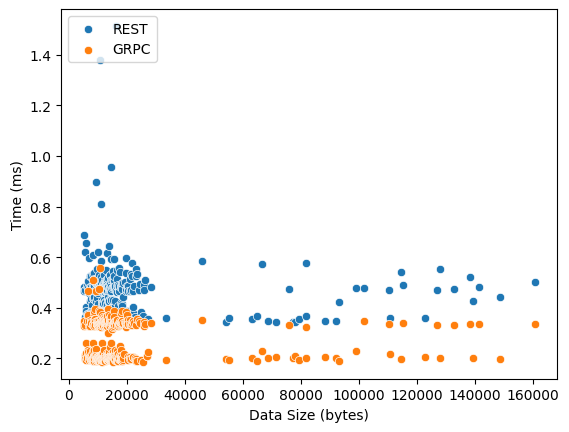

In [84]:
plot_scatter(df_plot)

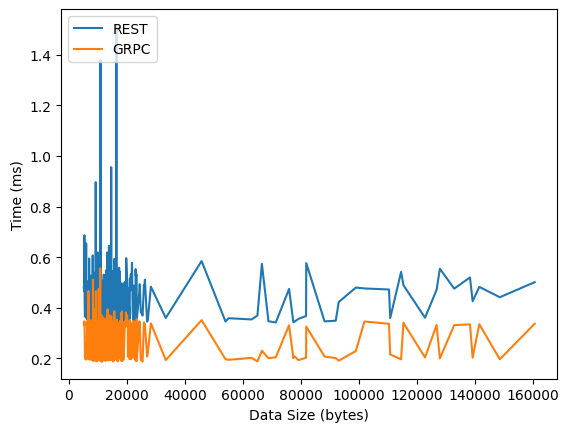

In [81]:
plot_line(df_plot)

In [52]:
df_plot

,image_name,rest_time,grpc_time,img_size
0,OIP-vdHKGriziG2Esulof9Yt_AD6D6.jpeg,0.481418,0.341608,5238
1,OIP-wLYB9ozRGQpGxNP75oK5dwHaE6.jpeg,0.465165,0.329969,5403
2,OIP-oPX1NlvcHK2ouZRagJb8VwHaE7.jpeg,0.686664,0.346590,5433
3,OIP-OReTIh1Tz1D5OnscQPnsIgHaGL.jpeg,0.470477,0.333139,5487
4,OIP-3SyK5ZcU9ahyRzTHJJt8iQEsDH.jpeg,0.364885,0.213583,5625
...,...,...,...,...
419,ef36b30c28e90021d85a5854ee454296eb70e3c818b413...,0.520055,0.334785,138223
420,ea37b90c20f0033ed1584d05fb1d4e9fe777ead218ac10...,0.425967,0.203458,139135
421,ea36b4092bf0003ed1584d05fb1d4e9fe777ead218ac10...,0.482800,0.335411,141425
422,ea36b00b2ff6043ed1584d05fb1d4e9fe777ead218ac10...,0.441922,0.196759,148484


In [54]:
df_filter = df_plot.loc[df_plot['img_size'] <30000]

df_filter

,image_name,rest_time,grpc_time,img_size
0,OIP-vdHKGriziG2Esulof9Yt_AD6D6.jpeg,0.481418,0.341608,5238
1,OIP-wLYB9ozRGQpGxNP75oK5dwHaE6.jpeg,0.465165,0.329969,5403
2,OIP-oPX1NlvcHK2ouZRagJb8VwHaE7.jpeg,0.686664,0.346590,5433
3,OIP-OReTIh1Tz1D5OnscQPnsIgHaGL.jpeg,0.470477,0.333139,5487
4,OIP-3SyK5ZcU9ahyRzTHJJt8iQEsDH.jpeg,0.364885,0.213583,5625
...,...,...,...,...
386,OIP-F9rH2fD-MeTQQ_WC-iYhJgHaFj.jpeg,0.511289,0.336719,26267
387,OIP-ZYoAuR6Ult0soCyXXy6S8AHaHd.jpeg,0.347384,0.209481,27007
388,10.jpeg,0.345363,0.207840,27041
389,OIP-TcKLuJNvZ6pZe3DxZo3D7wHaHa.jpeg,0.354130,0.224093,27300


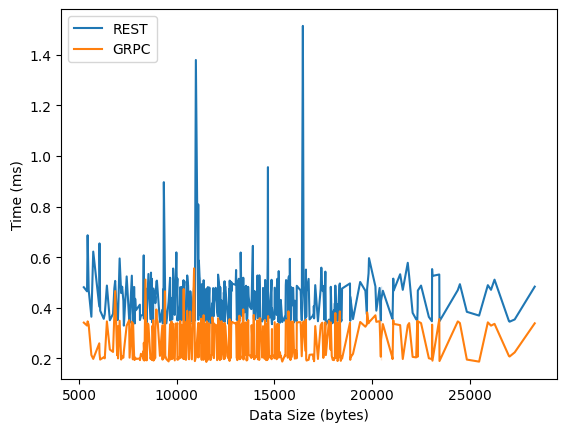

In [82]:
plot_line(df_plot.loc[df_plot['img_size'] <30000])

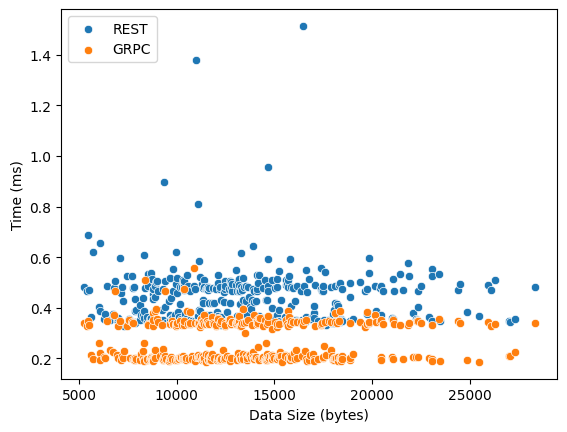

In [87]:
plot_scatter(df_plot.loc[df_plot['img_size'] <30000])

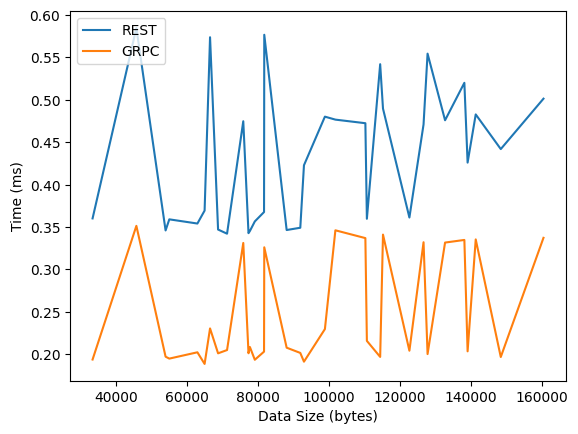

In [83]:
plot_line(df_plot.loc[df_plot['img_size'] >30000])